# Analýza hlavních komponent

## Úkol

- V datasetu Portland Housing Prices/Sales Jul 2020 - Jul 2021 zjistěte, jestli je zde problém multikolinearity.
- Proveďte analyzu hlavních komponent
- Vytvořte lineární model z PCA a model porovnejte s minulým cvičením

# Načtení dat

In [1]:
import pandas as pd 

In [11]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

# Analýza
- zobrazte data
- vyřešte NaN hodnoty
- zobrazte základní statistiky dat
- zobrazte korelační matici

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [33]:
# Zobrazení prvních pěti řádků datasetu
print(data.head())

# Kontrola chybějících hodnot
print(data.isnull().sum())

# Odstranění NaN hodnot
data = data.dropna()

# Zobrazení základních statistik datasetu
print(data.describe())


   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000
bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


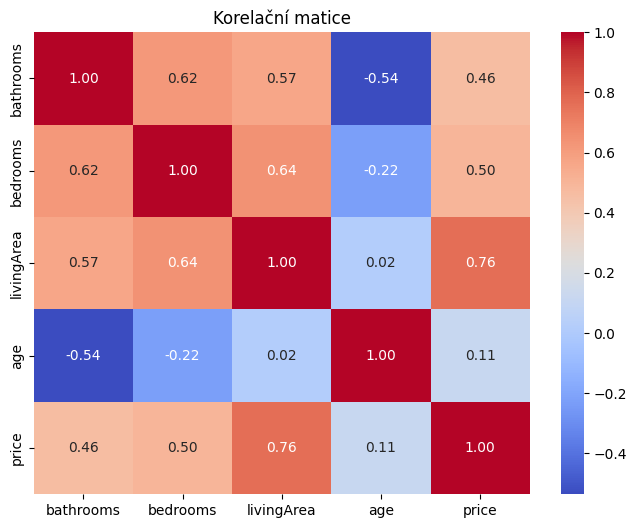

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelační matice")
plt.show()


# Příprava dat
- vyberte X promenné bathrooms', 'bedrooms', 'livingArea','age','price'
- proměnné standardizujte

In [35]:
# Výběr relevantních proměnných
selected_features = ['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']
data_selected = data[selected_features]


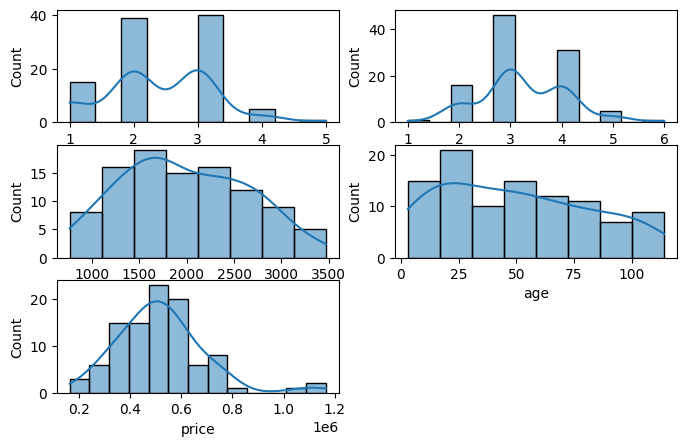

In [36]:
# Data před standardizací
pos = 1
fig = plt.figure(figsize=(8, 12))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i],ax=ax, kde=True)

In [37]:
# Z-standardization
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [38]:
# Vytvoření nového datasetu se standardizovanými proměnnými
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [39]:
# Popis nových proměnných
data_std.describe()

,bathrooms,bedrooms,livingArea,age,price
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.199041e-16,2.087219e-16,1.110223e-16,-6.217249e-17,9.436896e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.646330e+00,-2.627555e+00,-1.820412e+00,-1.430152e+00,-2.058988e+00
25%,-4.533373e-01,-3.022851e-01,-6.691682e-01,-9.115389e-01,-6.219070e-01
50%,-4.533373e-01,-3.022851e-01,-1.734099e-01,-7.260584e-02,-1.138480e-01
75%,7.396555e-01,8.603500e-01,7.777980e-01,7.739539e-01,4.640692e-01
max,3.125641e+00,3.185620e+00,2.254148e+00,1.956087e+00,3.747400e+00


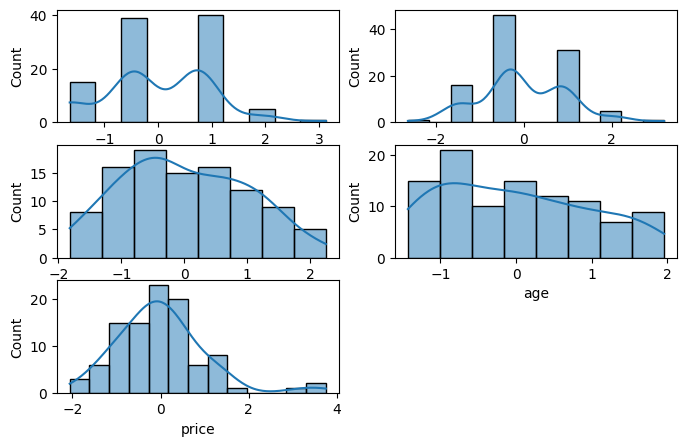

In [40]:
# Zobrazení distribuce celočíselných hodnot s odhadem distribuční funkce
# Tvar distribuce nových proměnných je stejný jako u původních proměnných
# pouze jejich střední hodnota je nyní 0
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

<Axes: >

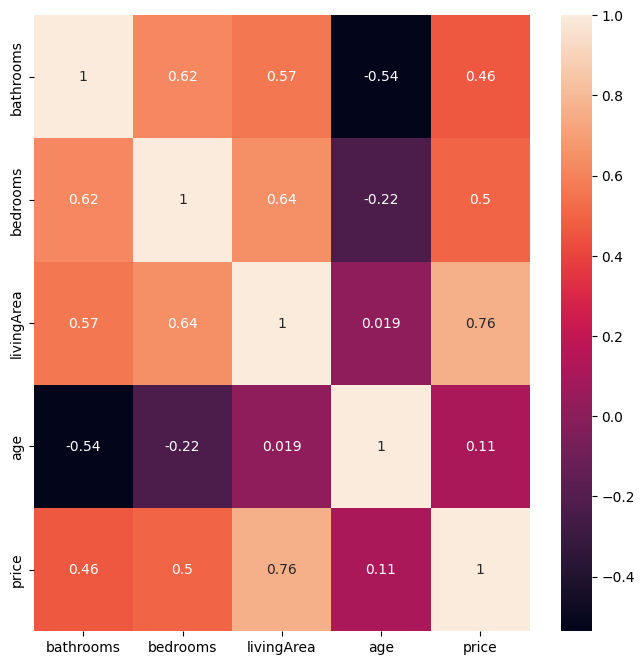

In [41]:
# korelace nových dat
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.heatmap(data_std.corr(),annot=True)

# Zobrazte VIF pro každou proměnnou

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [44]:
# Rozdělení dat na tréninková a testovací
X = np.array(data.drop('price',axis=1))
Y = np.array(data['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [46]:
# Výpočet VIF pro každou proměnnou
vifdf = []
for i in data.columns:
    X = np.array(data.drop(i,axis=1))
    y = np.array(data[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,age,1.930008
1,bedrooms,2.037278
4,price,2.550418
0,bathrooms,2.989507
2,livingArea,3.280001


# PCA
- Proveďte PCA
- zobrazte korelační matici

In [48]:
from sklearn.decomposition import PCA

In [ ]:
# Počet PCA komponent bude 4 stejně jako vstupních parametrů
pca = PCA(n_components=4)
X = data_std.drop('price',axis=1)
X_pca = pca.fit_transform(X)

In [56]:
# vytvoříme si nový dataset s proměnnými PCA a MEDV
data_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4'])
data_std_pca['price'] = data_std['price']

<Axes: >

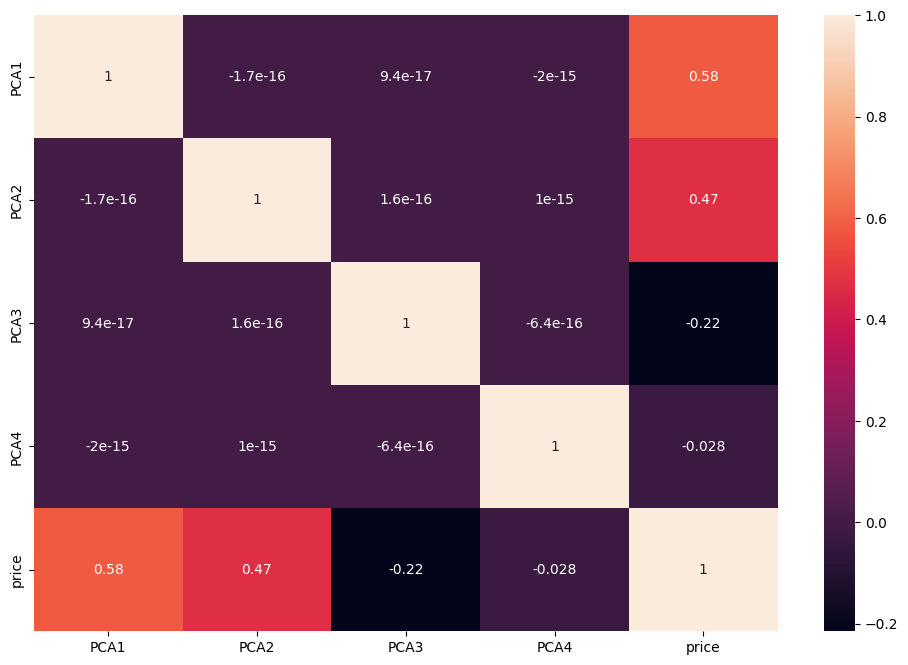

In [54]:
# korelační matice
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.heatmap(data_std_pca.corr(),annot=True)

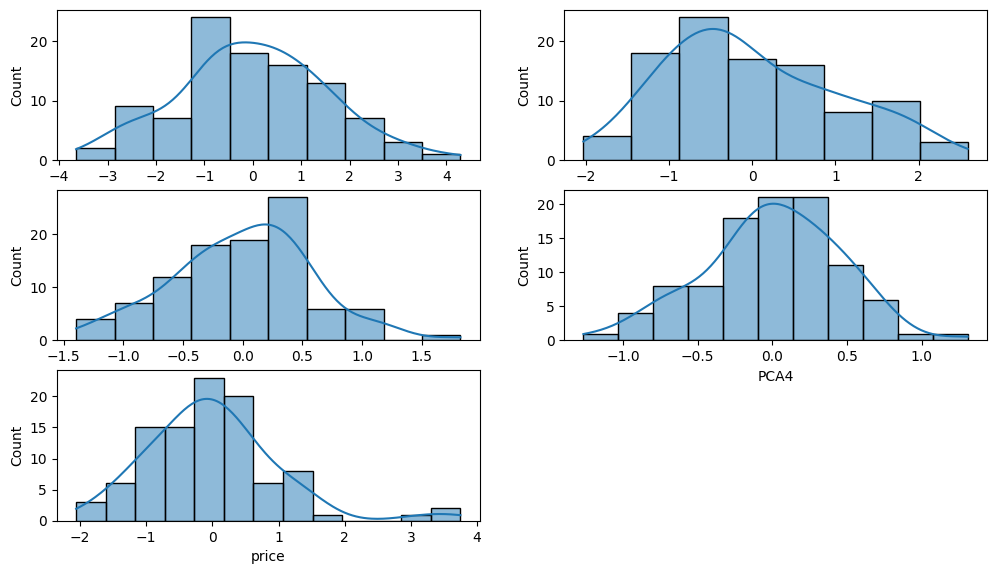

In [57]:
# Distribuční funkce PCA proměnných jsou odlišné od původních
pos = 1
fig = plt.figure(figsize=(12,16))
for i in data_std_pca.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std_pca[i],ax=ax, kde=True)

# Lineární model
- Vytvořte a natrénujte Lineární model pro PCA proměnné
- Zobrazte R2 a RMSE

In [58]:
# rozdělení dat na trénovací a testovací
X = np.array(data_std_pca.drop('price',axis=1))
Y = np.array(data_std_pca['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [59]:
# vytvoření lineárního modelu
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [60]:
# Posouzení modelu pro trénovací data
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.5605197225748668
RMSE: 0.6632418885404389


In [62]:
# Posouzení modelu pro trénovací data
Y_pred = lr.predict(X_test[:,0:6])
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.7728035055252302
RMSE: 0.43524675277056274
